In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import ipywidgets as widgets

data_files = [
    './data/2e2mu_2011.csv',
    './data/2e2mu_2011.csv',
    './data/4e_2011.csv',
    './data/2e2mu_2011.csv',
    './data/4mu_2012.csv',
    './data/4e_2012.csv',
    './data/2e2mu_2012.csv',
]

'''
Use this for Colab
data_files = [
    'https://raw.githubusercontent.com/QuarkNet-HEP/cms-notebooks/master/data/2e2mu_2011.csv',
    'https://raw.githubusercontent.com/QuarkNet-HEP/cms-notebooks/master/data/2e2mu_2011.csv',
    'https://raw.githubusercontent.com/QuarkNet-HEP/cms-notebooks/master/data/4e_2011.csv',
    'https://raw.githubusercontent.com/QuarkNet-HEP/cms-notebooks/master/data/2e2mu_2011.csv',
    'https://raw.githubusercontent.com/QuarkNet-HEP/cms-notebooks/master/data/4mu_2012.csv',
    'https://raw.githubusercontent.com/QuarkNet-HEP/cms-notebooks/master/data/4e_2012.csv',
    'https://raw.githubusercontent.com/QuarkNet-HEP/cms-notebooks/master/data/2e2mu_2012.csv',
]
'''

df = pd.concat([pd.read_csv(data_file) for data_file in data_files])

df.head()

,Run,Event,PID1,E1,px1,py1,pz1,pt1,eta1,phi1,...,px4,py4,pz4,pt4,eta4,phi4,Q4,mZ1,mZ2,M
0,172401,3729470,-11,79.8732,45.89740,11.87580,-64.28160,47.4089,-1.112080,0.253193,...,30.98270,-0.575343,-73.15080,30.9881,-1.594180,-0.018568,-1,90.3889,92.5390,185.6930
1,172868,933807102,-11,102.4490,87.37190,52.30650,-11.22650,101.8320,-0.110022,0.539437,...,-35.07490,32.778000,-21.67610,48.0067,-0.437438,2.390030,1,92.1786,87.8203,314.5390
2,163237,41158481,11,23.1604,10.69640,18.87770,8.10096,21.6975,0.365189,1.055280,...,5.95324,10.817800,4.77278,12.3477,0.377502,1.067710,-1,41.1734,40.0133,84.6655
3,166554,395098004,11,13.6666,9.92125,-5.87347,-7.33812,11.5295,-0.599842,-0.534523,...,13.64210,3.018710,5.71822,13.9721,0.398618,0.217769,1,56.0502,20.0315,90.2377
4,166950,1491724484,11,65.4968,34.82010,34.71490,43.26980,49.1687,0.793947,0.783884,...,-13.60520,15.095600,105.22900,20.3218,2.346790,2.304310,1,91.2442,89.6807,188.9340


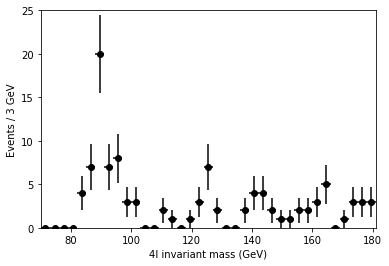

In [3]:
rmin = 70
rmax = 181
nbins = 37

M_hist = np.histogram(
    df['M'],
    bins=nbins,
    range=(rmin,rmax),
)

hist, bins = M_hist
width = 1.0*(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

xerrs = [width*0.5 for i in range(0, nbins)]
yerrs = np.sqrt(hist)

plt.errorbar(center, hist, xerr=xerrs, yerr=yerrs, linestyle='None', color='black', marker='o')

plt.xlabel('4l invariant mass (GeV)')
plt.ylabel('Events / 3 GeV')
plt.ylim(0, 25)
plt.xlim(rmin, rmax)
plt.show()

In [4]:
dy = np.array([0,0,0,0,0,0.354797,0.177398,2.60481,0,0,0,0,0,0,0,0,0,0.177398,0.177398,0,0.177398,0,0,0,0,0,0,0,0,0,0,0,0.177398,0,0,0,0])
ttbar = np.array([0.00465086,0,0.00465086,0,0,0,0,0,0,0,0.00465086,0,0,0,0,0,0.00465086,0,0,0,0,0.00465086,0.00465086,0,0,0.0139526,0,0,0.00465086,0,0,0,0.00465086,0.00465086,0.0139526,0,0])
zz = np.array([0.181215,0.257161,0.44846,0.830071,1.80272,4.57354,13.9677,14.0178,4.10974,1.58934,0.989974,0.839775,0.887188,0.967021,1.07882,1.27942,1.36681,1.4333,1.45141,1.41572,1.51464,1.45026,1.47328,1.42899,1.38757,1.33561,1.3075,1.29831,1.31402,1.30672,1.36442,1.39256,1.43472,1.58321,1.85313,2.19304,2.95083])
hzz = np.array([0.00340992,0.00450225,0.00808944,0.0080008,0.00801578,0.0108945,0.00794274,0.00950757,0.0130648,0.0163568,0.0233832,0.0334813,0.0427229,0.0738129,0.13282,0.256384,0.648352,2.38742,4.87193,0.944299,0.155005,0.0374193,0.0138906,0.00630364,0.00419265,0.00358719,0.00122527,0.000885718,0.000590479,0.000885718,0.000797085,8.86337e-05,0.000501845,8.86337e-05,0.000546162,4.43168e-05,8.86337e-05])

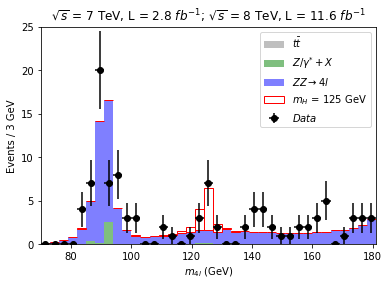

In [5]:
#ttbar 
ttbar_bar = plt.bar(center, ttbar, align='center', 
                    width=width, color='gray', linewidth=0, 
                    edgecolor='b', alpha=0.5)

#DY
dy_bar = plt.bar(center, dy, align='center', 
                 width=width, color='g', linewidth=0, 
                 edgecolor='black', alpha=0.5, bottom=ttbar)

#ZZ
zz_bar = plt.bar(center, zz, align='center', 
                 width=width, color='b', linewidth=0, 
                 edgecolor='black', alpha=0.5, bottom=ttbar+dy)

#HZZ
hzz_bar = plt.bar(center, hzz, align='center', 
                  width=width, color='w', linewidth=1, 
                  edgecolor='r', bottom=ttbar+dy+zz)

#data
data_bar = plt.errorbar(center, hist, 
                        xerr=xerrs, yerr=yerrs, 
                        linestyle='None', color='black', marker='o')

plt.title(r'$\sqrt{s}$ = 7 TeV, L = $2.8~fb^{-1}$; $\sqrt{s}$ = 8 TeV, L = $11.6~fb^{-1}$')

plt.legend(
    [
        ttbar_bar, 
         dy_bar, 
         zz_bar, 
         hzz_bar, 
         data_bar
    ], 
    [
        r'$t\bar{t}$',
        r'$Z/\gamma^{*} + X$',
        r'$ZZ \rightarrow 4l$',
        r'$m_{H}$ = 125 GeV',
        r'$Data$'
    ]
)

plt.xlabel(r'$m_{4l}$ (GeV)')
plt.ylabel(r'Events / 3 GeV')
plt.ylim(0,25)
plt.xlim(rmin,rmax)
plt.show()

In [6]:
@widgets.interact_manual(
    rmin=(70,800),
    rmax=(70,800),
    bins=(10,100)
)

def plot(rmin=70, rmax=181, bins=37):
    
    h, b, i = plt.hist(df['M'], bins=bins, range=(rmin,rmax))
    plt.ylabel(r'')
    plt.xlabel(r'$m_{4l}$ (GeV)')
    plt.show()

interactive(children=(IntSlider(value=70, description='rmin', max=800, min=70), IntSlider(value=181, descripti…